<a href="https://colab.research.google.com/github/kanopf/Cat_Breed_Classification/blob/main/Cat_breed_Classificator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [5]:
! mkdir ~/.kaggle

In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

In [8]:
!kaggle datasets download -d ma7555/cat-breeds-dataset --force

100% 1.92G/1.93G [00:16<00:00, 56.6MB/s]
100% 1.93G/1.93G [00:17<00:00, 120MB/s] 


In [ ]:
!unzip cat-breeds-dataset.zip

In [10]:
!mkdir /content/train
!mkdir /content/test

In [2]:
import os
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
import random
import numpy as np
import shutil

In [3]:
cat_breed_folder = '/content/images'
train_path = '/content/train'
test_path = '/content/test'

breed_list = os.listdir('/content/images')

for breed in breed_list:
  breed_folder = os.listdir('/content/images/{}'.format(breed))
  random.shuffle(breed_folder)
  train_labels_class, test_labels_class = np.split(breed_folder, [int(len(breed_folder) * 0.8)])
  try:
    os.mkdir(train_path + '/' + breed)
    os.mkdir(test_path + '/' + breed)
  except:
    pass
  for img in train_labels_class:
    shutil.move(cat_breed_folder + "/" + breed + '/' + img , train_path + "/"+ breed + "/" + img)
  for img in test_labels_class:
    shutil.move(cat_breed_folder + "/" + breed + '/' + img , test_path + "/"+ breed + "/" + img )


In [6]:
print(len(breed_list))

67


In [4]:
train_path = os.path.join('/content/train')
test_path = os.path.join('/content/test')

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200,200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(100, (3,3),padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(67, activation='softmax')
])

model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics = ['accuracy'])

In [11]:
train_datagen = ImageDataGenerator(
      rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path, target_size=(200,200),
    batch_size = 20,
    class_mode ='categorical')

validation_generator = test_datagen.flow_from_directory(
    test_path, target_size = (200,200),
    batch_size = 20,
    class_mode='categorical')

Found 101260 images belonging to 67 classes.
Found 25347 images belonging to 67 classes.


In [14]:
history = model.fit(train_generator, steps_per_epoch = 50, epochs = 25,
                    validation_data = validation_generator,
                    validation_steps = 10,
                    verbose = 1)


Epoch 1/25
50/50 [==============================] - 5s 97ms/step - loss: 2.7688 - accuracy: 0.4010 - val_loss: 2.8459 - val_accuracy: 0.4000
Epoch 2/25
50/50 [==============================] - 5s 98ms/step - loss: 2.6518 - accuracy: 0.4280 - val_loss: 1.7188 - val_accuracy: 0.7000
Epoch 3/25
50/50 [==============================] - 5s 100ms/step - loss: 2.7811 - accuracy: 0.3850 - val_loss: 3.4972 - val_accuracy: 0.3000
Epoch 4/25
50/50 [==============================] - 5s 96ms/step - loss: 2.5843 - accuracy: 0.4450 - val_loss: 2.2568 - val_accuracy: 0.5000
Epoch 5/25
50/50 [==============================] - 5s 93ms/step - loss: 2.7018 - accuracy: 0.4170 - val_loss: 1.9569 - val_accuracy: 0.6000
Epoch 6/25
50/50 [==============================] - 5s 95ms/step - loss: 2.6893 - accuracy: 0.4230 - val_loss: 3.7151 - val_accuracy: 0.3000
Epoch 7/25
50/50 [==============================] - 5s 96ms/step - loss: 2.6761 - accuracy: 0.4140 - val_loss: 2.9191 - val_accuracy: 0.3000
Epoch 8/25
5

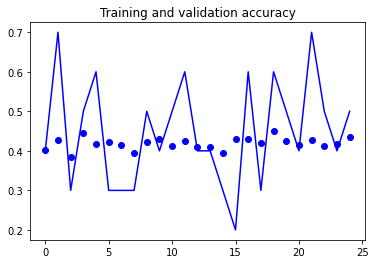

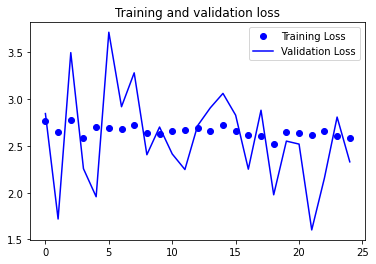

In [15]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()